In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# X_train, Y_train = load_cifar_10_data_batch(path + '/cifar-10-batches-py/data_batch_1')
# X_test, Y_test = load_cifar_10_data_batch

In [3]:
with np.load('Buildingtop.npz') as Buildingtop:
    train_x = Buildingtop['train_x']
    train_y = Buildingtop['train_Y']
    test_x = Buildingtop['test_x']
    test_y = Buildingtop['test_y']
with np.load('Treetop.npz') as Treetop:
    train_x = np.vstack((train_x,Treetop['train_x']))
    train_y = np.hstack((train_y,Treetop['train_Y']))
    test_x = np.vstack((test_x,Treetop['test_x']))
    test_y = np.hstack((test_y,Treetop['test_y']))
with np.load('BigBuilding.npz') as BigBuilding:
    train_x = np.vstack((train_x,BigBuilding['train_x']))
    train_y = np.hstack((train_y,BigBuilding['train_Y']))
    test_x = np.vstack((test_x,BigBuilding['test_x']))
    test_y = np.hstack((test_y,BigBuilding['test_y']))
with np.load('skycloudcontrast.npz') as skycloudcontrast:
    train_x = np.vstack((train_x,skycloudcontrast['train_x']))
    train_y = np.hstack((train_y,skycloudcontrast['train_Y']))
    test_x = np.vstack((test_x,skycloudcontrast['test_x']))
    test_y = np.hstack((test_y,skycloudcontrast['test_y']))

In [4]:
print(np.shape(train_x))
print(np.shape(train_y))
print(np.shape(test_x))
print(np.shape(test_y))

# train_y=train_y.reshape(200,1)
# test_y=test_y.reshape(20,1)
num_example=train_x.shape[0]
arr=np.arange(num_example)
np.random.shuffle(arr)
train_x=train_x[arr]
train_y=train_y[arr]
# train_y=train_y.reshape(200,)
# test_y=test_y.reshape(20,)
print(np.shape(train_x))
print(np.shape(train_y))

(400, 129792)
(400,)
(80, 129792)
(80,)
(400, 129792)
(400,)


In [5]:
X_train=train_x
Y_train=train_y
X_test=test_x
Y_test=test_y

In [6]:
print(train_y)

[1 2 0 1 0 3 1 3 0 1 1 3 0 3 3 0 3 3 1 3 2 2 2 3 0 1 2 1 2 3 0 3 3 3 1 3 3
 1 1 2 0 0 3 3 2 0 3 0 0 3 2 2 1 3 2 1 1 3 2 0 0 2 1 2 1 0 0 0 2 0 2 2 3 0
 1 2 0 0 0 0 1 0 0 2 1 0 0 3 2 3 2 1 3 3 1 3 2 2 2 1 1 1 0 2 1 0 1 3 2 2 1
 1 1 1 2 1 3 2 0 3 0 1 1 0 2 0 1 0 1 1 0 0 0 3 3 1 0 2 1 2 0 3 1 0 2 2 1 0
 1 1 2 1 2 2 2 3 0 2 3 0 1 1 3 0 2 0 0 3 2 0 0 2 0 1 3 3 3 1 3 1 2 3 0 3 2
 1 1 2 0 1 3 1 2 2 0 1 2 3 3 1 3 3 2 2 3 3 3 2 0 3 0 0 3 2 0 2 0 1 3 1 2 3
 2 2 3 0 3 2 1 2 1 1 1 2 0 1 0 1 1 2 2 3 0 0 1 1 3 2 0 1 2 1 3 3 3 2 0 0 0
 3 0 2 2 3 3 3 1 0 2 2 3 0 2 2 2 2 3 2 3 0 0 1 2 3 2 3 2 3 2 0 0 0 1 2 1 3
 3 2 3 3 0 3 3 3 0 3 0 3 3 1 0 1 3 1 2 0 0 1 0 0 2 0 0 2 1 2 2 0 3 0 1 1 2
 3 2 0 2 0 1 2 3 1 3 0 1 2 3 2 3 1 2 0 0 3 0 1 3 2 3 1 1 2 1 3 2 1 3 3 1 1
 3 1 1 0 3 2 0 3 1 3 0 1 0 1 1 1 1 2 0 1 1 0 2 2 3 0 0 1 2 2]


In [7]:
# 2.function
# 2.1 # init weight random distribution
def weights(shape):
    return tf.Variable(tf.random_normal(shape=shape, mean=0, stddev=0.1))
# 2.2 init bias
def biases(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))

# 2.3 #     
# x input tensor of shape [batch, in_height, in_width, in_channels]
# W filter/kernel tensor of shape [filter_height, filter_width, in_channels, out_channels]
# strides[0]=strides[3]=1 strides[x] stands "x"direction, strides[y]stands "y" dicrection
# padding: "SAME",OR "VALID"
def conv2d(x, W):
    return tf.nn.conv2d(input=x, filter=W, strides=[1,1,1,1], padding='SAME', use_cudnn_on_gpu=True)
# 2.4 pooling layer
def max_pool(x):
    return tf.nn.max_pool(value=x, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')


# compute accuracy
def compute_accuracy(x_test, y_test):
    global predict_function
    predict_test = sess.run(predict_function, feed_dict={xs:x_test})
    # 比较预测值与测试集最大值下标是否相同, 返回相同个数
    """
    =================================
    """
    y_test_one_hot = tf.one_hot(y_test, depth = 4)
    correct_num = tf.equal(tf.argmax(predict_test, 1), tf.argmax(y_test_one_hot, 1))
    # calculate mean then turn to float32
    accuracy = tf.reduce_mean(tf.cast(correct_num, tf.float32))
    return sess.run(accuracy, feed_dict={xs:x_test, ys:y_test})

In [8]:
"""
=================
"""
# 3.define inpute shape
xs = tf.placeholder(tf.float32, [None, 416*104*3])/255
ys = tf.placeholder(tf.int32, [None])

# 4. build process
# # change xs format into a 4D vector [batch, in_height, in_width, in_channels]
x0 = tf.transpose(tf.reshape(xs, [-1, 3, 104, 416]), perm=[0, 2, 3, 1])

# 4.1 conv1→pooling→conv2→pooling

# after first pooling image is 208x52
# after second pooling image is 104x26
# activation function use relu (alternative)
# conv1 layer uses 30 conv2 uses 60 (alternative)
W_conv1 = weights([5, 5, 3, 30])
b_conv1 = biases([30])
a_conv1 = conv2d(x0, W_conv1) + b_conv1
z_conv1 = tf.nn.relu(a_conv1)
h_conv1 = max_pool(z_conv1)

W_conv2 = weights([5, 5, 30, 60])
b_conv2 = biases([60])
a_conv2 = conv2d(h_conv1, W_conv2) + b_conv2
z_conv2 = tf.nn.relu(a_conv2)
h_conv2 = max_pool(z_conv2)

# output 104*26*60

"""
==============
"""
x_conv0 = tf.reshape(h_conv2, [-1, 104*26*60])
# 4.2 fully connected networks
"""
=============
"""
W_fc1 = weights([104*26*60, 1024])
b_fc1 = biases([1024])
a_fc1 = tf.matmul(x_conv0, W_fc1) + b_fc1
z_fc1 = tf.nn.sigmoid(a_fc1)
"""
==========================drop out

"""
# drop_prob = tf.placeholder(tf.float32)
# h_fc1_drop = tf.nn.dropout(z_fc1,drop_prob)

"""
===============
"""
W_fc2 = weights([1024, 4])
b_fc2 = biases([4])
a_fc2 = tf.matmul(z_fc1, W_fc2) + b_fc2
# z_fc2 = tf.nn.sigmoid(a_fc2)


# 4.3 prediction function
predict_function = a_fc2
"""
=============================
"""
ys_one_hot = tf.one_hot(ys, depth = 4)
# cost_function = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(predict_function), reduction_indices=[1]))
cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys_one_hot, logits=predict_function))

# 4.4 Optimizer uses GradientDescentOptimizer
#  which minimise the cost_function
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cost_function)
# train_step = tf.train.AdamOptimizer(0.01).minimize(cost_function)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [9]:
# 5. 训练并图像化表示
sess = tf.Session()
sess.run(tf.global_variables_initializer())

saver = tf.train.Saver()
plot_acc = []
plot_loss = []
for epoch in range(20):
    for t in range(0, 400-10, 10):
        iter = t // 10
        xs_batch, ys_batch = X_train[t:t+10], Y_train[t:t+10]
        sess.run(train_step, feed_dict={xs:xs_batch, ys:ys_batch})
        if iter % 10== 0:
            cost = sess.run(cost_function, feed_dict={xs: xs_batch, ys: ys_batch})
#             accuracy = compute_accuracy(X_test, Y_test)
#             print("epoch:%s,iters:%s, cost:%s, accuracy:%s" % (epoch+1, iter, cost, accuracy))
#             print("Building top: ", compute_accuracy(X_test[0:20], Y_test[0:20]))
#             print("tree top: ", compute_accuracy(X_test[20:40], Y_test[20:40]))
#             print("big building: ", compute_accuracy(X_test[40:60], Y_test[40:60]))
#             print("contrast: ", compute_accuracy(X_test[60:80], Y_test[60:80]))
    accuracy = compute_accuracy(X_test, Y_test)
    print("epoch:%s,iters:%s, cost:%s, accuracy:%s" % (epoch+1, iter, cost, accuracy))
    plot_loss.append(cost)
    plot_acc.append(accuracy)
saver.save(sess, 'C:\\Users\\35252\\Desktop\\new test\\model.ckpt')


"""
============================
"""
# for i in range(20):
#     xs_batch, ys_batch = X_train, Y_train
#     sess.run(train_step, feed_dict={xs:xs_batch, ys:ys_batch})
#     cost = sess.run(cost_function, feed_dict={xs: xs_batch, ys: ys_batch})
#     accuracy = compute_accuracy(X_test, Y_test)
#     print("iters:%s, cost:%s, accuracy:%s" % (i, cost, accuracy))

sess.close()


epoch:1,iters:38, cost:0.8760473, accuracy:0.2625
epoch:2,iters:38, cost:0.5723856, accuracy:0.45
epoch:3,iters:38, cost:0.54920274, accuracy:0.4
epoch:4,iters:38, cost:0.33839592, accuracy:0.6125
epoch:5,iters:38, cost:0.25440386, accuracy:0.725
epoch:6,iters:38, cost:0.21381335, accuracy:0.875
epoch:7,iters:38, cost:0.18814868, accuracy:0.875
epoch:8,iters:38, cost:0.17017451, accuracy:0.875
epoch:9,iters:38, cost:0.15669782, accuracy:0.875
epoch:10,iters:38, cost:0.14608406, accuracy:0.8875
epoch:11,iters:38, cost:0.13740686, accuracy:0.8875
epoch:12,iters:38, cost:0.13010485, accuracy:0.8875
epoch:13,iters:38, cost:0.12382035, accuracy:0.8875
epoch:14,iters:38, cost:0.11831514, accuracy:0.9
epoch:15,iters:38, cost:0.11342464, accuracy:0.9
epoch:16,iters:38, cost:0.1090317, accuracy:0.9
epoch:17,iters:38, cost:0.105049774, accuracy:0.9
epoch:18,iters:38, cost:0.101413846, accuracy:0.8875
epoch:19,iters:38, cost:0.09807354, accuracy:0.8875
epoch:20,iters:38, cost:0.094988815, accurac

In [23]:
print(plot_acc)
print(plot_loss)

[0.2625, 0.45, 0.4, 0.6125, 0.725, 0.875, 0.875, 0.875, 0.875, 0.8875, 0.8875, 0.8875, 0.8875, 0.9, 0.9, 0.9, 0.9, 0.8875, 0.8875, 0.8875]
[0.8760473, 0.5723856, 0.54920274, 0.33839592, 0.25440386, 0.21381335, 0.18814868, 0.17017451, 0.15669782, 0.14608406, 0.13740686, 0.13010485, 0.12382035, 0.11831514, 0.11342464, 0.1090317, 0.105049774, 0.101413846, 0.09807354, 0.094988815]


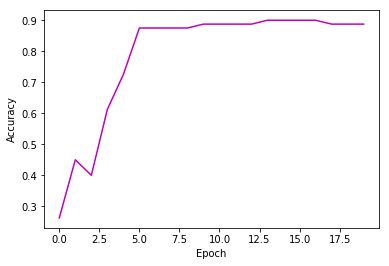

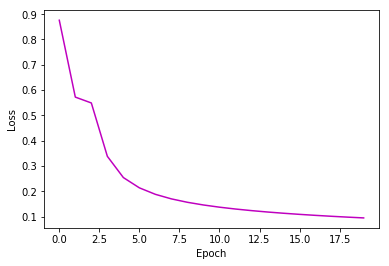

In [22]:
import matplotlib.pyplot as plt
X = [x for x in range(0, 20)]
Y = plot_acc
plt.plot(X,Y,c="m")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()
Y2 = plot_loss
plt.plot(X,Y2,c="m")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [10]:
"""
tensorboard, need be fixed
"""

# with tf.name_scope('conv1'):
#         conv1 = tf.nn.conv2d(x4d, weight_variable('conv1', [5, 5, 3, 64], 5e-2, 'w_conv1'), strides=[1, 1, 1, 1], padding='SAME')
#         conv1 = tf.nn.bias_add(conv1, bias_variable('conv1', 0.0, tf.float32, [64], 'b_conv1'))
#         conv1 = tf.nn.relu(conv1)

# with tf.name_scope('accuracy'):
#         with tf.name_scope('correct_prediction'):
#             correct_pred = tf.equal(tf.argmax(fc3, 1), tf.argmax(y, 1))
#         with tf.name_scope('accuracy'):
#             accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
#     tf.summary.scalar('accuracy', accuracy)

# merged_summary_op = tf.summary.merge_all()

# summary_writer = tf.summary.FileWriter('./tensorboard/log/', graph=tf.get_default_graph())

'\ntensorboard, need be fixed\n'

In [11]:
with np.load('1Buildingtop.npz') as a:
    real = a['train_x']

with np.load('1Tree top.npz') as b:
    real = np.vstack((real,b['train_x']))

with np.load('1Big building.npz') as c:
    real = np.vstack((real,c['train_x']))

with np.load('1Cloudy.npz') as d:
    real = np.vstack((real,d['train_x']))
print(np.shape(real))

(60, 129792)


In [12]:
print(test_y)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [13]:
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('C:\\Users\\35252\\Desktop\\new test\\model.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('C:\\Users\\35252\\Desktop\\new test\\'))
    count = 0
    for r in real:
        count+=1
        r = r.reshape((1,129792))
        predict_test = sess.run(predict_function, feed_dict={xs:r})
        temp = predict_test[0].tolist()
        print(temp.index(max(temp))+1)
        if count%15 == 0:
            print("=====================")
    #打印出预测矩阵
#     print(accuracy)


INFO:tensorflow:Restoring parameters from C:\Users\35252\Desktop\new test\model.ckpt
4
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
2
3
2
1
2
1
1
3
4
2
3
2
3
4
4
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
2
2
1
2
1
1
1
1
2
1
1
